In [111]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/scaler_clustering.csv')

In [114]:
print(df.head(30))
print(df.shape)

    Unnamed: 0                         company_hash  \
0            0                       atrgxnnt xzaxv   
1            1            qtrxvzwt xzegwgbb rxbxnta   
2            2                        ojzwnvwnxw vx   
3            3                            ngpgutaxv   
4            4                           qxen sqghu   
5            5  yvuuxrj hzbvqqxta bvqptnxzs ucn rna   
6            6                   lubgqsvz wyvot  wg   
7            7                 vwwtznhqt ntwyzgrgsj   
8            8                   utqoxontzn ojontbo   
9            9                                xrbhd   
10          10                      ztfstz ogenfvqt   
11          11                           ngdor ntwy   
12          12           mvqwrvjo wgqugqvnt mvzpxzs   
13          13                            wgszxkvzn   
14          14                               xznhxn   
15          15                               bgsrxd   
16          16                    pnw xzaxv ucn rna   
17        

In [115]:
df.rename(columns={'Unnamed: 0':'ID'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [116]:
df.isnull().sum()

ID                      0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

In [117]:
df.shape

(205843, 7)

In [118]:
# df.drop(index=df[(df['company_hash'].isnull()) | (df['orgyear'].isnull())].index,inplace=True)

In [119]:
# dropping ID column
df.drop(columns='ID',inplace=True)

# Transforming CTC
df['log_ctc']=np.log(df['ctc'])

# Dropping duplicate rows
print('Number of duplicate rows = '+str(np.sum(df.duplicated())))
df.drop_duplicates(inplace=True)
# df[['company_hash','email_hash','orgyear','ctc','job_position','ctc_updated_year']].duplicated().value_counts()
# df.drop_duplicates(subset=['company_hash','email_hash','orgyear','log_ctc','job_position','ctc_updated_year'],inplace=True)
# print(df[['company_hash','email_hash','orgyear','ctc','job_position','ctc_updated_year']].duplicated().value_counts())

# Dropping rows that could have inaccurate data
df.drop(index=df[(df['orgyear']<1000) | (df['orgyear']>df['ctc_updated_year'])].index,inplace=True)
# print(df[(df['orgyear']<1000) | (df['orgyear']>df['ctc_updated_year'])])

# Dropping all NA rows
# print('ToDO: Impute the missing data')
# df.dropna(axis=0,how='any',inplace=True)

Number of duplicate rows = 34


<ipython-input-120-5c37d4147b92>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(dist_company.index,rotation=90)
<ipython-input-120-5c37d4147b92>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(dist_job.index,rotation=90)


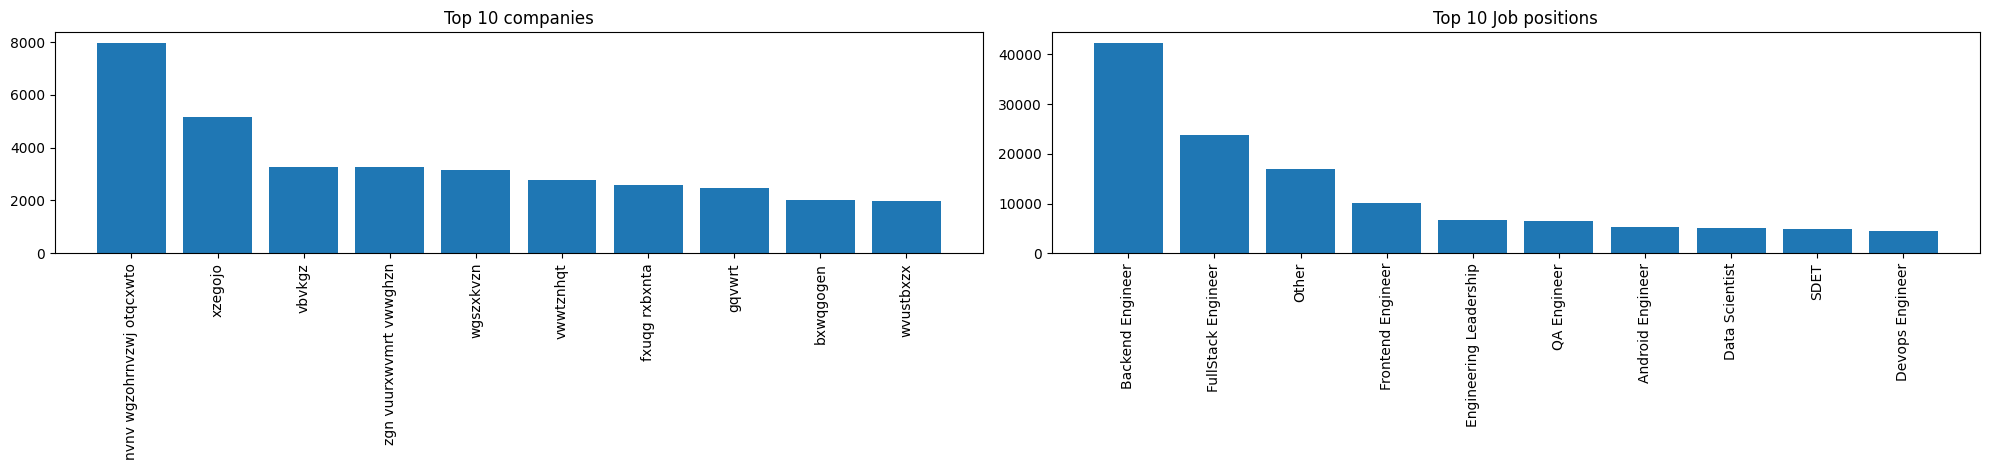

In [120]:
fig,ax=plt.subplots(nrows=1,ncols=2)
plt.rcParams.update({'font.size':10})
fig.set_figwidth(20)

dist_company=df['company_hash'].value_counts().head(10)
dist_job=df['job_position'].value_counts().head(10)

ax[0].bar(dist_company.index,dist_company)
ax[0].set_xticklabels(dist_company.index,rotation=90)
ax[0].set_title('Top 10 companies')

ax[1].bar(dist_job.index,dist_job)
ax[1].set_xticklabels(dist_job.index,rotation=90)
ax[1].set_title('Top 10 Job positions')

plt.tight_layout()

Text(0.5, 1.0, 'Frequency of occurence of emails')

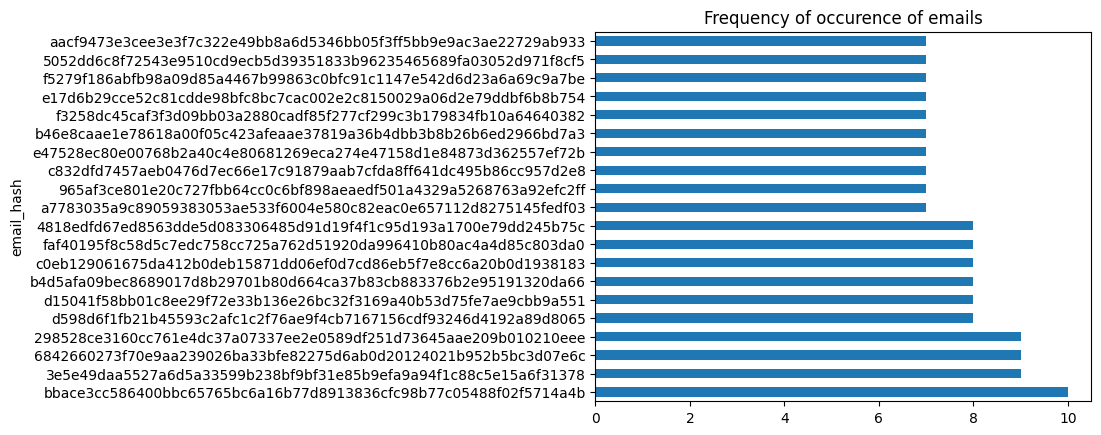

In [121]:
df['email_hash'].value_counts().head(20).plot(kind='barh')
plt.xlabel('')
plt.title('Frequency of occurence of emails')

In [122]:
df_emailcounts=pd.DataFrame(df['email_hash'].value_counts().reset_index())
df_emailcounts.rename(columns={'count':'email_count'},inplace=True)

df_companycounts=pd.DataFrame(df['company_hash'].value_counts().reset_index())
df_companycounts.rename(columns={'count':'company_count'},inplace=True)

df_jobcounts=pd.DataFrame(df['job_position'].value_counts().reset_index())
df_jobcounts.rename(columns={'count':'job_count'},inplace=True)


df=pd.merge(df,df_emailcounts)
df=pd.merge(df,df_companycounts)

df=pd.merge(df,df_jobcounts,how='left')
df['isjob_null']=df['job_position'].isnull()
df=df[['company_count','email_count','job_count','isjob_null','orgyear','log_ctc','ctc_updated_year']]


In [123]:
print(df.isnull().sum())
print(df.shape)


company_count           0
email_count             0
job_count           48684
isjob_null              0
orgyear                86
log_ctc                 0
ctc_updated_year        0
dtype: int64
(196890, 7)


<Axes: xlabel='orgyear', ylabel='log_ctc'>

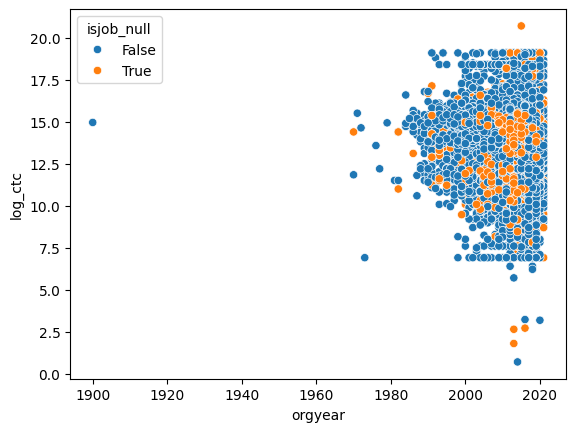

In [124]:
import seaborn as sns
sns.scatterplot(data=df,x='orgyear',y='log_ctc',hue='isjob_null')

<Axes: xlabel='company_count', ylabel='Count'>

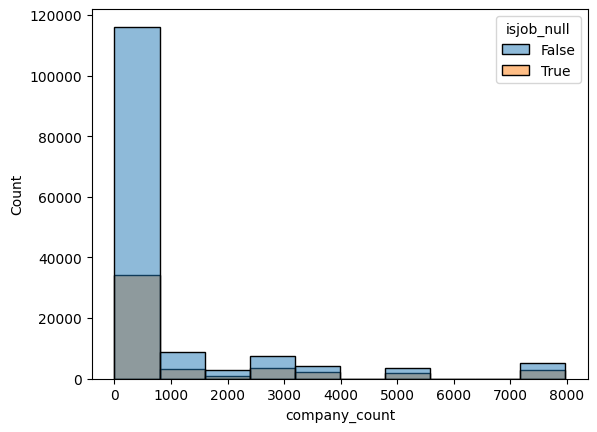

In [125]:
sns.histplot(data=df,x='company_count',hue='isjob_null',bins=10)

<Axes: xlabel='email_count', ylabel='Count'>

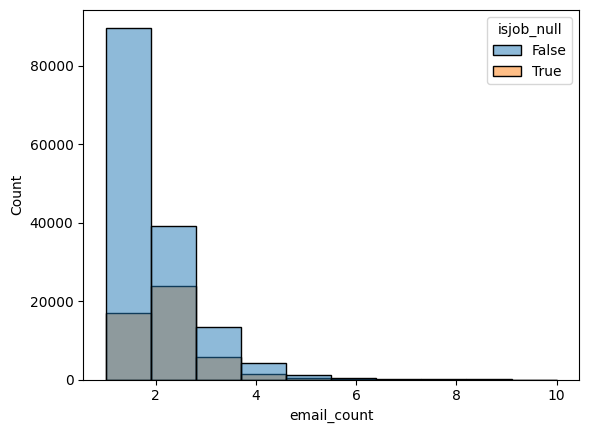

In [126]:
sns.histplot(data=df,x='email_count',hue='isjob_null',bins=10)

<Axes: xlabel='orgyear', ylabel='Count'>

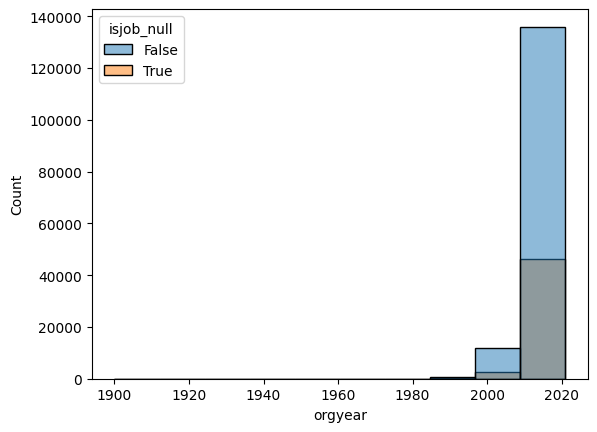

In [127]:
sns.histplot(data=df,x='orgyear',hue='isjob_null',bins=10)

<Axes: xlabel='ctc_updated_year', ylabel='Count'>

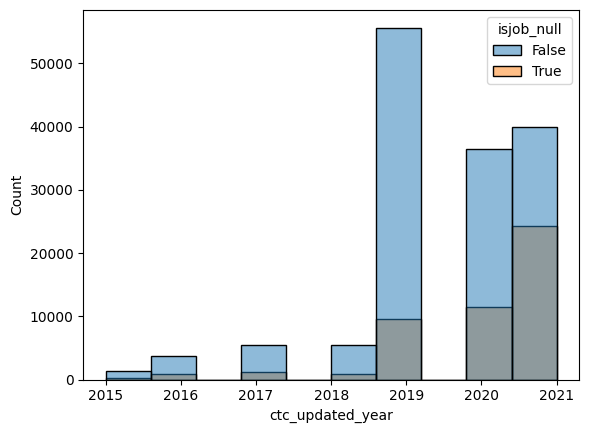

In [128]:
sns.histplot(data=df,x='ctc_updated_year',hue='isjob_null',bins=10)

In [129]:
df.head()

,company_count,email_count,job_count,isjob_null,orgyear,log_ctc,ctc_updated_year
0,9,2,17022.0,False,2016.0,13.910821,2020.0
1,9,4,42338.0,False,2019.0,13.122363,2020.0
2,9,1,5127.0,False,2017.0,14.346139,2020.0
3,9,1,42338.0,False,2014.0,13.815511,2018.0
4,9,1,5257.0,False,2017.0,13.304685,2021.0


In [130]:
df.shape

(196890, 7)

In [131]:
df.isnull().sum()

company_count           0
email_count             0
job_count           48684
isjob_null              0
orgyear                86
log_ctc                 0
ctc_updated_year        0
dtype: int64

# Unsure why there are duplicates of email_hash. Ideally this should be unique to each individual learner. However same value is linked with different job_profiles. For the rest of this analysis, I assume each row is a unique individual.

ToDO

1. what is the typical time for promotion for different roles within and between companies?
2. What is the CTC difference between roles in a company and between companies
3. How did the learners joining scaler change in job role over time?
  **There are corrections needed in orgyear**






# Fill missing values using SimpleImputer

In [132]:
from sklearn.impute import SimpleImputer
import time

start=time.time()
np_imputed=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df)
print('Time = '+str(time.time()-start))
df_imputed=pd.DataFrame(np_imputed,columns=df.columns)

Time = 0.28114891052246094


In [133]:
# df['updated']=np.where(df['job_count'].isnull(),np.nan,df['job_count'])

In [134]:
# df[df.isnull()]=np.nan

In [135]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196890 entries, 0 to 196889
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_count     196890 non-null  float64
 1   email_count       196890 non-null  float64
 2   job_count         196890 non-null  float64
 3   isjob_null        196890 non-null  float64
 4   orgyear           196890 non-null  float64
 5   log_ctc           196890 non-null  float64
 6   ctc_updated_year  196890 non-null  float64
dtypes: float64(7)
memory usage: 10.5 MB


# Feature Engineering

In [136]:
df_imputed['YoE']=df_imputed['ctc_updated_year']-df_imputed['orgyear']

# df['group_YoE']=df['YoE']
# df['group_YoE']=(np.floor(df['YoE']/3))+1
# df['group_YoE'].value_counts()

df_imputed['YoE'].describe()

count    196890.000000
mean          4.771634
std           4.067384
min          -3.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         119.000000
Name: YoE, dtype: float64

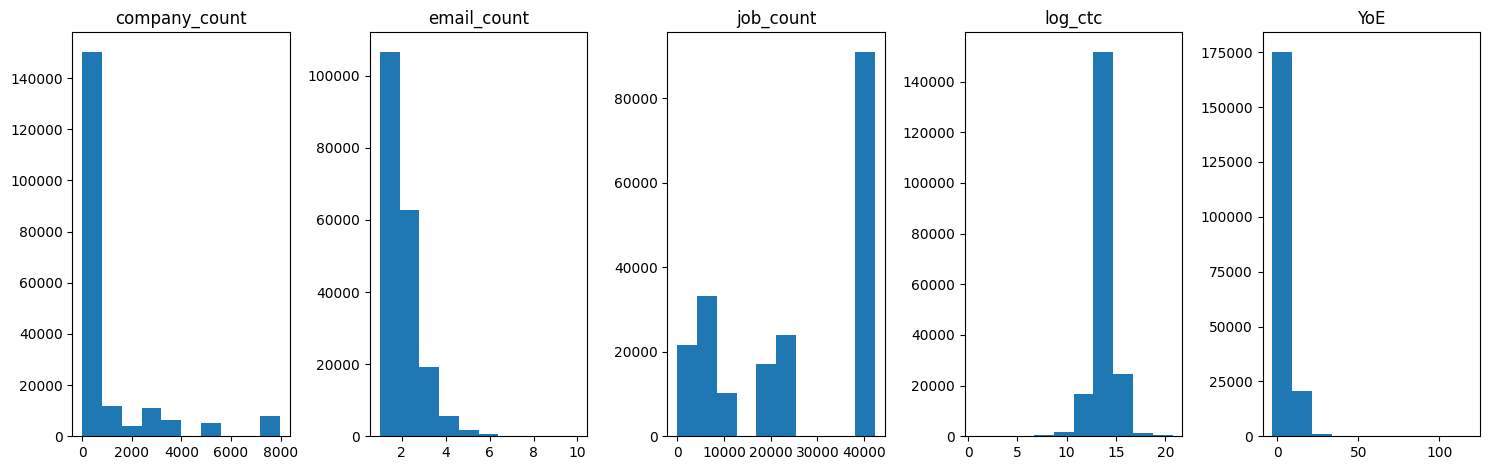

In [137]:
fig,ax=plt.subplots(nrows=1,ncols=5)
fig.set_figwidth(15)
df_imputed['log_email_count']=np.log(df['email_count'])
cols_to_plot=['company_count','email_count','job_count','log_ctc','YoE']
for finx,f in enumerate(cols_to_plot):
  ax[finx].hist(df_imputed[f],bins=10)
  ax[finx].set_title(f)

plt.tight_layout()

In [138]:
start=time.time()
df_desig=df_imputed.groupby(['company_count','job_count','YoE'])['log_ctc'].agg(['mean','median'])
print(time.time()-start)

0.0398256778717041


In [139]:
df_desig

mean     median
company_count job_count YoE                       
1.0           1.0       0.0   13.559315  13.416257
                        1.0   11.970485  11.156251
                        2.0   13.774262  13.465928
                        3.0   13.539155  13.541074
                        4.0   13.496009  13.122363
...                                 ...        ...
7971.0        42338.0   25.0  12.611538  12.611538
                        26.0  13.304685  13.304685
                        27.0  13.652992  13.652992
                        30.0  14.935636  15.201805
                        31.0  13.815511  13.815511

[32549 rows x 2 columns]

In [140]:
# df['company_count']=df['company_hash']
# df.loc[df['company_count']<100,'group_company']='OTHER'
# # df['group_company'].fillna('OTHER')

# df['group_job']=df['job_position']
# df.loc[df['job_count']<1000,'group_job']='OTHER'
# df['group_job'].value_counts()

# df['group_YoE']=df['YoE']
# df['group_YoE']=(np.floor(df['YoE']/3))+1
# df['group_YoE'].value_counts()

df_desig=df_imputed.groupby(['company_count','job_count','YoE'])['log_ctc'].agg(['mean','median'])
df_desig.columns=['mean_desig','median_desig']
df_desig.reset_index(inplace=True)
df_imputed=pd.merge(df_imputed,df_desig,on=['company_count','job_count','YoE'],how='left')

df_class=df_imputed.groupby(['company_count','job_count'])['log_ctc'].agg(['mean','median'])
df_class.columns=['mean_class','median_class']
df_class.reset_index(inplace=True)
df_imputed=pd.merge(df_imputed,df_class,on=['company_count','job_count'],how='left')

df_tier=df.groupby('company_count')['log_ctc'].agg(['mean','median'])
df_tier.columns=['mean_tier','median_tier']
df_imputed=pd.merge(df_imputed,df_tier,on='company_count',how='left')


# Designation is based on Company, YoE and dept
df_imputed['desig']=3
df_imputed.loc[df_imputed['log_ctc']==df_imputed['median_desig'],'desig']=2
df_imputed.loc[df_imputed['log_ctc']>df_imputed['median_desig'],'desig']=1

# Class is based on company, dept
df_imputed['class']=3
df_imputed.loc[df['log_ctc']==df_imputed['median_class'],'class']=2
df_imputed.loc[df['log_ctc']>df_imputed['median_class'],'class']=1

# Tier is based on Company
df_imputed['tier']=3
# df_imputed['tier']=np.where(df['log_ctc']<=df_imputed['median_tier'],2,1)
df_imputed.loc[df['log_ctc']<=df_imputed['median_tier'],'tier']=2
df_imputed.loc[df['log_ctc']>df_imputed['median_tier'],'tier']=1



In [141]:
df_imputed.head()

,company_count,email_count,job_count,isjob_null,orgyear,log_ctc,ctc_updated_year,YoE,log_email_count,mean_desig,median_desig,mean_class,median_class,mean_tier,median_tier,desig,class,tier
0,9.0,2.0,17022.0,0.0,2016.0,13.910821,2020.0,4.0,0.693147,13.765010,13.883169,13.518460,13.399995,13.743901,13.815511,1,1,1
1,9.0,4.0,42338.0,0.0,2019.0,13.122363,2020.0,1.0,1.386294,13.268338,13.457406,13.734599,13.815511,13.743901,13.815511,3,3,2
2,9.0,1.0,5127.0,0.0,2017.0,14.346139,2020.0,3.0,0.000000,14.132482,14.151983,13.998170,13.976552,13.743901,13.815511,1,1,1
3,9.0,1.0,42338.0,0.0,2014.0,13.815511,2018.0,4.0,0.000000,13.647328,13.815511,13.734599,13.815511,13.743901,13.815511,2,2,2
4,9.0,1.0,5257.0,0.0,2017.0,13.304685,2021.0,4.0,0.000000,13.609110,13.487006,13.934751,13.914526,13.743901,13.815511,3,3,2


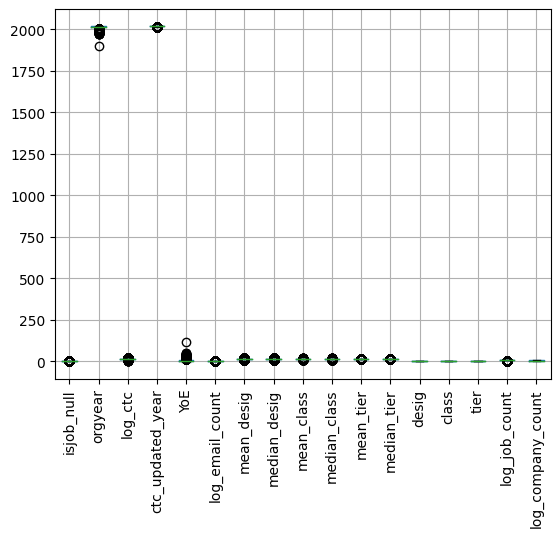

In [142]:
df_imputed['log_job_count']=np.log(df_imputed['job_count'])
df_imputed['log_company_count']=np.log(df_imputed['company_count'])

df_imputed.drop(columns=['company_count','job_count','email_count'],inplace=True)
df_imputed.boxplot()
plt.xticks(rotation=90)
plt.show()

In [144]:
df_imputed.to_pickle('/content/gdrive/My Drive/Colab Notebooks/clustering_pkl.pkl')

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
!pip install umap-learn
import umap

from sklearn.cluster import KMeans, DBSCAN
import time


In [ ]:
df=pd.read_pickle('/content/gdrive/My Drive/Colab Notebooks/clustering_pkl.pkl')

X=df.copy()


In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc=StandardScaler()
X_scaled=stdsc.fit_transform(X)

# X_scaled
import matplotlib.pyplot as plt
plt.boxplot(X_scaled)
plt.xticks(rotation=90)
plt.show()

array([[-0.57313936,  0.25658018,  0.15593121, ..., -1.02682103,
         0.04507524, -0.73187364],
       [-0.57313936,  0.96900873, -0.59987603, ...,  0.97387954,
         0.70847274, -0.73187364],
       [-0.57313936,  0.49405636,  0.57322271, ..., -1.02682103,
        -0.82859303, -0.73187364],
       ...,
       [ 1.74477635, -0.21837219,  1.65704546, ..., -1.02682103,
         0.70847274, -1.51582572],
       [ 1.74477635, -0.45584837, -2.29845592, ...,  0.97387954,
         0.70847274, -1.51582572],
       [ 1.74477635,  0.01910399,  0.90378331, ..., -1.02682103,
         0.70847274, -1.51582572]])

In [ ]:
print(X_scaled.shape)

rand_rows=np.random.randint(148144,size=30000)
X_sm=X_scaled[rand_rows,:]
print(X_sm.shape)

(196890, 17)
(30000, 17)


In [ ]:
from sklearn.decomposition import PCA

pcamodel=PCA(n_components=2).fit(X_scaled)
pcacomponents=pcamodel.transform(X_scaled)

In [ ]:
pcamodel.explained_variance_ratio_
# pca.shape

array([0.32795093, 0.16889765])

Text(0.5, 1.0, 'PCA using all the data rows')

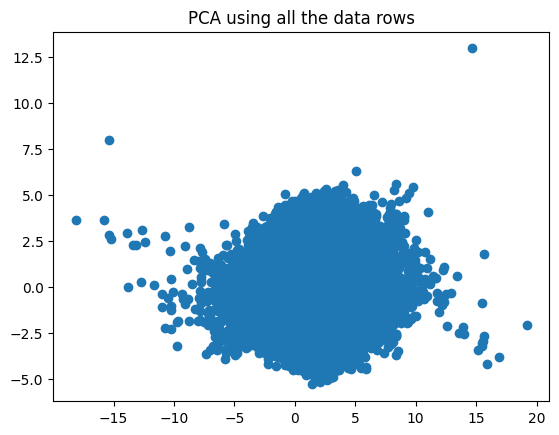

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pcacomponents[:,0],pcacomponents[:,1])
plt.title('PCA using all the data rows')

['time taken = 54.45223116874695']


Text(0.5, 1.0, 'UMAP using a subset of data')

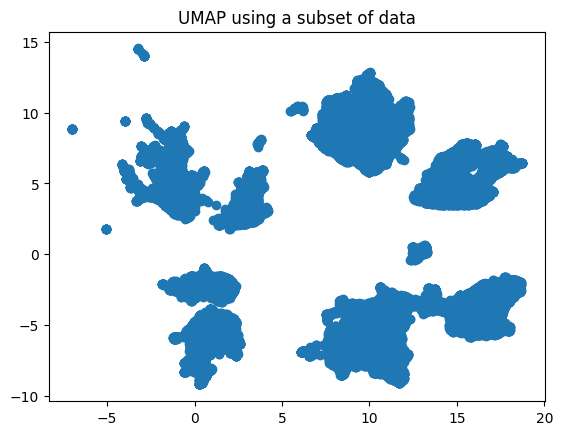

In [ ]:
start=time.time()
umap_components=umap.UMAP().fit_transform(X_sm)
print(['time taken = '+str(time.time()-start)])

plt.scatter(umap_components[:,0],umap_components[:,1])
plt.title('UMAP using a subset of data')

# Clustering

In [ ]:
KMeansobj=[KMeans(n_clusters=i).fit(X_sm) for i in range(1,10)]

WCSS=[Kobj.inertia_ for Kobj in KMeansobj]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Beyond 5 clusters gain in WCSS is low


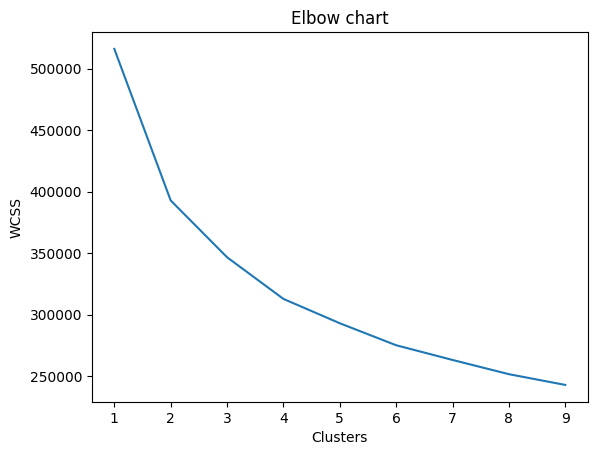

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),WCSS)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Elbow chart')
print('Beyond 5 clusters gain in WCSS is low')

Between 4 and 5 clusters, 5 clusters has higher Silhouette score. Hence 5 clusters is optimal


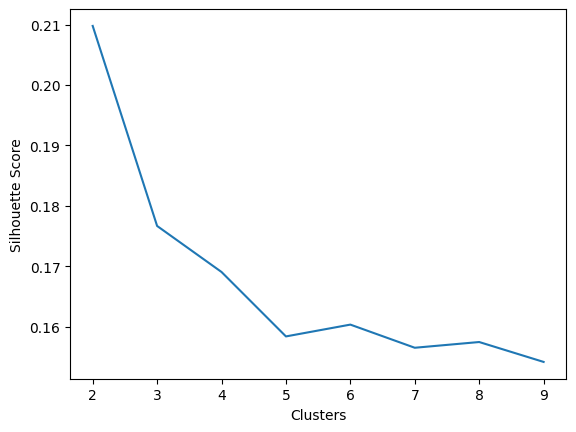

In [ ]:
from sklearn.metrics import silhouette_score

sil_score=[silhouette_score(X_sm,kmeansobj.predict(X_sm)) for kmeansobj in KMeansobj[1:]]

plt.plot(range(2,10),sil_score)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
print('Between 4 and 5 clusters, 5 clusters has higher Silhouette score. Hence 5 clusters is optimal')

<Axes: xlabel='umap_component_1', ylabel='umap_component_2'>

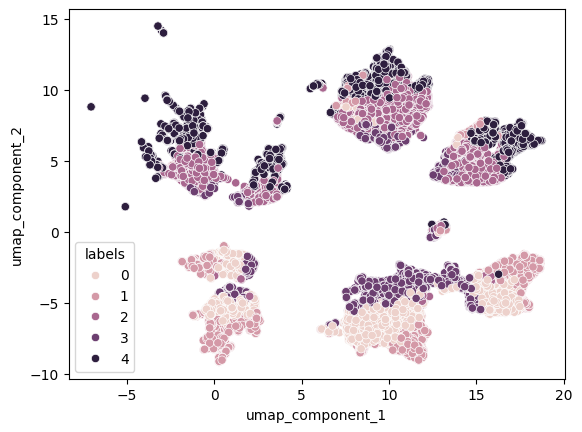

In [ ]:

Kmeans_with_umap=pd.DataFrame(umap_components,columns=['umap_component_1','umap_component_2'])
Kmeans_with_umap['labels']=KMeansobj[4].labels_
Kmeans_with_umap.head()

sns.scatterplot(data=Kmeans_with_umap,x='umap_component_1',y='umap_component_2',hue='labels')

In [ ]:
# Kmeans_with_pca=pd.DataFrame(pcacomponents,columns=['pca_component_1','pca_component_2'])
# Kmeans_with_pca['labels']=KMeansobj[4].labels_
# Kmeans_with_pca.head()

# sns.scatterplot(data=Kmeans_with_pca,x='pca_component_1',y='pca_component_2',hue='labels')

# DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

min_pts=56

distances,indices=NearestNeighbors(n_neighbors=3).fit(X_sm).kneighbors(X_sm)

plt.plot(np.sort(distances,axis=0)[:,1])
# plt.yscale('log')
plt.show()


https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

https://www.khoury.northeastern.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf

In [ ]:
# start=time.time()
# dbscan=DBSCAN(eps=1.5,min_samples=56).fit(X_sm)
# print('time = '+str(time.time()-start))

# print(pd.DataFrame(dbscan.labels_).value_counts())

In [ ]:
eps_vals=np.arange(1,2,0.3)

start=time.time()
dbscan_objs=[DBSCAN(eps=eps_val,min_samples=56).fit(X_sm) for eps_val in eps_vals]
print(time.time()-start)

dbscan_numlabels=[np.max(dbscan_obj.labels_) for dbscan_obj in dbscan_objs]

38.736809492111206


In [ ]:
dbscan_numlabels=[np.max(dbscan_obj.labels_) for dbscan_obj in dbscan_objs]
plt.plot(eps_vals,dbscan_numlabels)
plt.show()

In [ ]:
start=time.time()
dbscan=DBSCAN(eps=1.2,min_samples=56).fit(X_sm)
print('time = '+str(time.time()-start))

print(pd.DataFrame(dbscan.labels_).value_counts())

time = 2.7090604305267334
-1     18188
 4      2275
 7      2079
 1      2071
 5      1818
 2       796
 8       587
 0       571
 11      468
 10      388
 9       331
 3       322
 6       106
Name: count, dtype: int64


In [ ]:
dbscan.labels_.dtype
df_sm=pd.DataFrame(X_sm,columns=X.columns)
df_sm['dbscan_labels']=dbscan.labels_

In [ ]:
df_sm.head()

,isjob_null,orgyear,log_ctc,ctc_updated_year,YoE,log_email_count,mean_desig,median_desig,mean_class,median_class,mean_tier,median_tier,desig,class,tier,log_job_count,log_company_count,dbscan_labels
0,1.744776,0.969009,-0.363238,-0.548824,-1.173149,0.664273,-0.655666,-0.629428,0.052357,0.013031,0.058237,0.017737,0.003308,1.022727,0.973880,0.708473,-0.484564,1
1,1.744776,0.019104,-0.091221,1.039237,0.302005,0.664273,-0.351502,-0.277576,-0.796215,-0.633011,-0.846311,-0.746622,-1.085839,-1.024723,-1.026821,0.708473,-1.268516,-1
2,-0.573139,-1.168277,0.573223,-0.548824,1.039581,0.664273,0.944646,0.977637,0.429551,0.299053,-0.012230,0.146123,1.092455,-1.024723,-1.026821,-0.810362,-0.731874,-1
3,-0.573139,0.731533,-0.305124,0.245206,-0.681431,0.664273,-1.131740,-1.256495,-1.071252,-1.126281,-1.329398,-1.490632,-1.085839,-1.024723,-1.026821,0.708473,1.289450,0
4,-0.573139,0.969009,-0.941781,-0.548824,-1.173149,0.664273,-0.964739,-1.370530,-1.369601,-1.677848,-1.650798,-1.852513,1.092455,1.022727,0.973880,-1.487172,1.689438,-1


Text(0.5, 1.0, 'Groups sizes across DBSCAN labels')

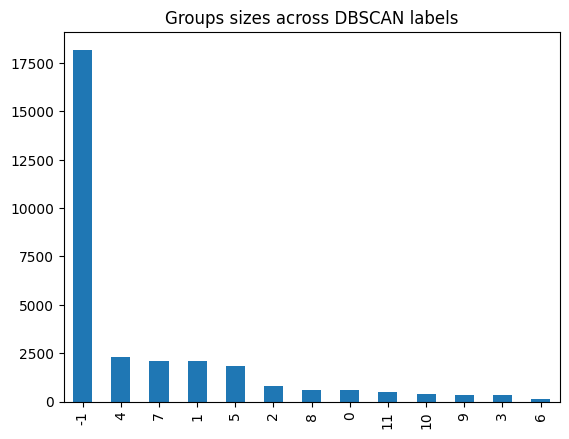

In [ ]:
df_sm['dbscan_labels'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.title('Groups sizes across DBSCAN labels')

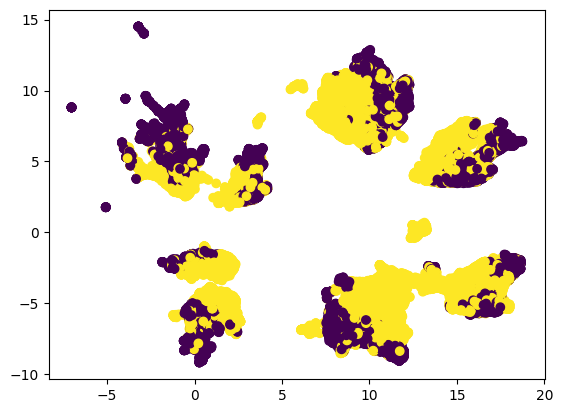

In [ ]:
plt.scatter(umap_components[:,0],umap_components[:,1],c=df_sm['dbscan_labels']==-1)
plt.show()

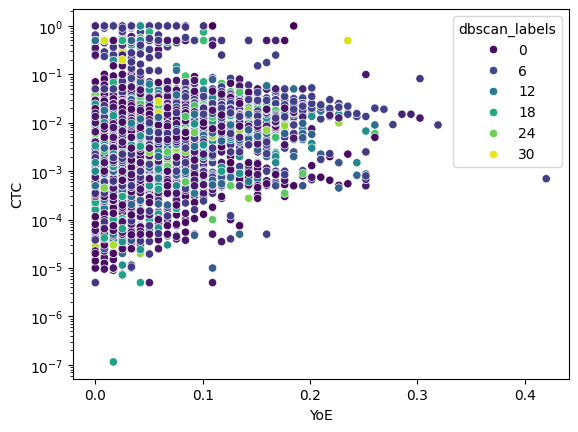

In [ ]:
# sns.scatterplot(data=df_sm,x='YoE',y='log_ctc',hue='dbscan_labels',palette='viridis')
# plt.xlabel('YoE')
# plt.ylabel('CTC')
# plt.yscale('log')

# plt.show()